<a href="https://colab.research.google.com/github/raphaellins/ai-playground/blob/master/neural_classification_sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.3.0'

In [4]:
df_alexa = pd.read_csv('/content/drive/MyDrive/machine_learning_practice/amazon_alexa.tsv', sep = '\t')

In [ ]:
df_alexa['verifield_reviews']

In [5]:
positive = df_alexa[df_alexa['feedback'] == 1]

In [7]:
negative = df_alexa[df_alexa['feedback'] == 0]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


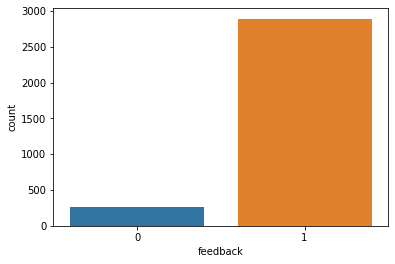

In [9]:
sns.countplot(df_alexa["feedback"], label='count')

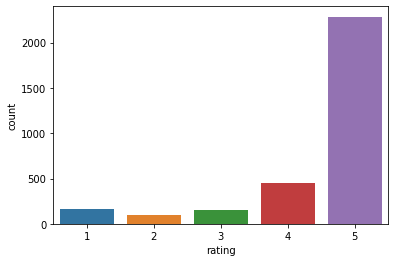

In [10]:
sns.countplot(x = 'rating', data= df_alexa)

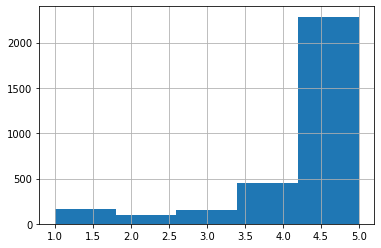

In [12]:
df_alexa['rating'].hist(bins = 5)

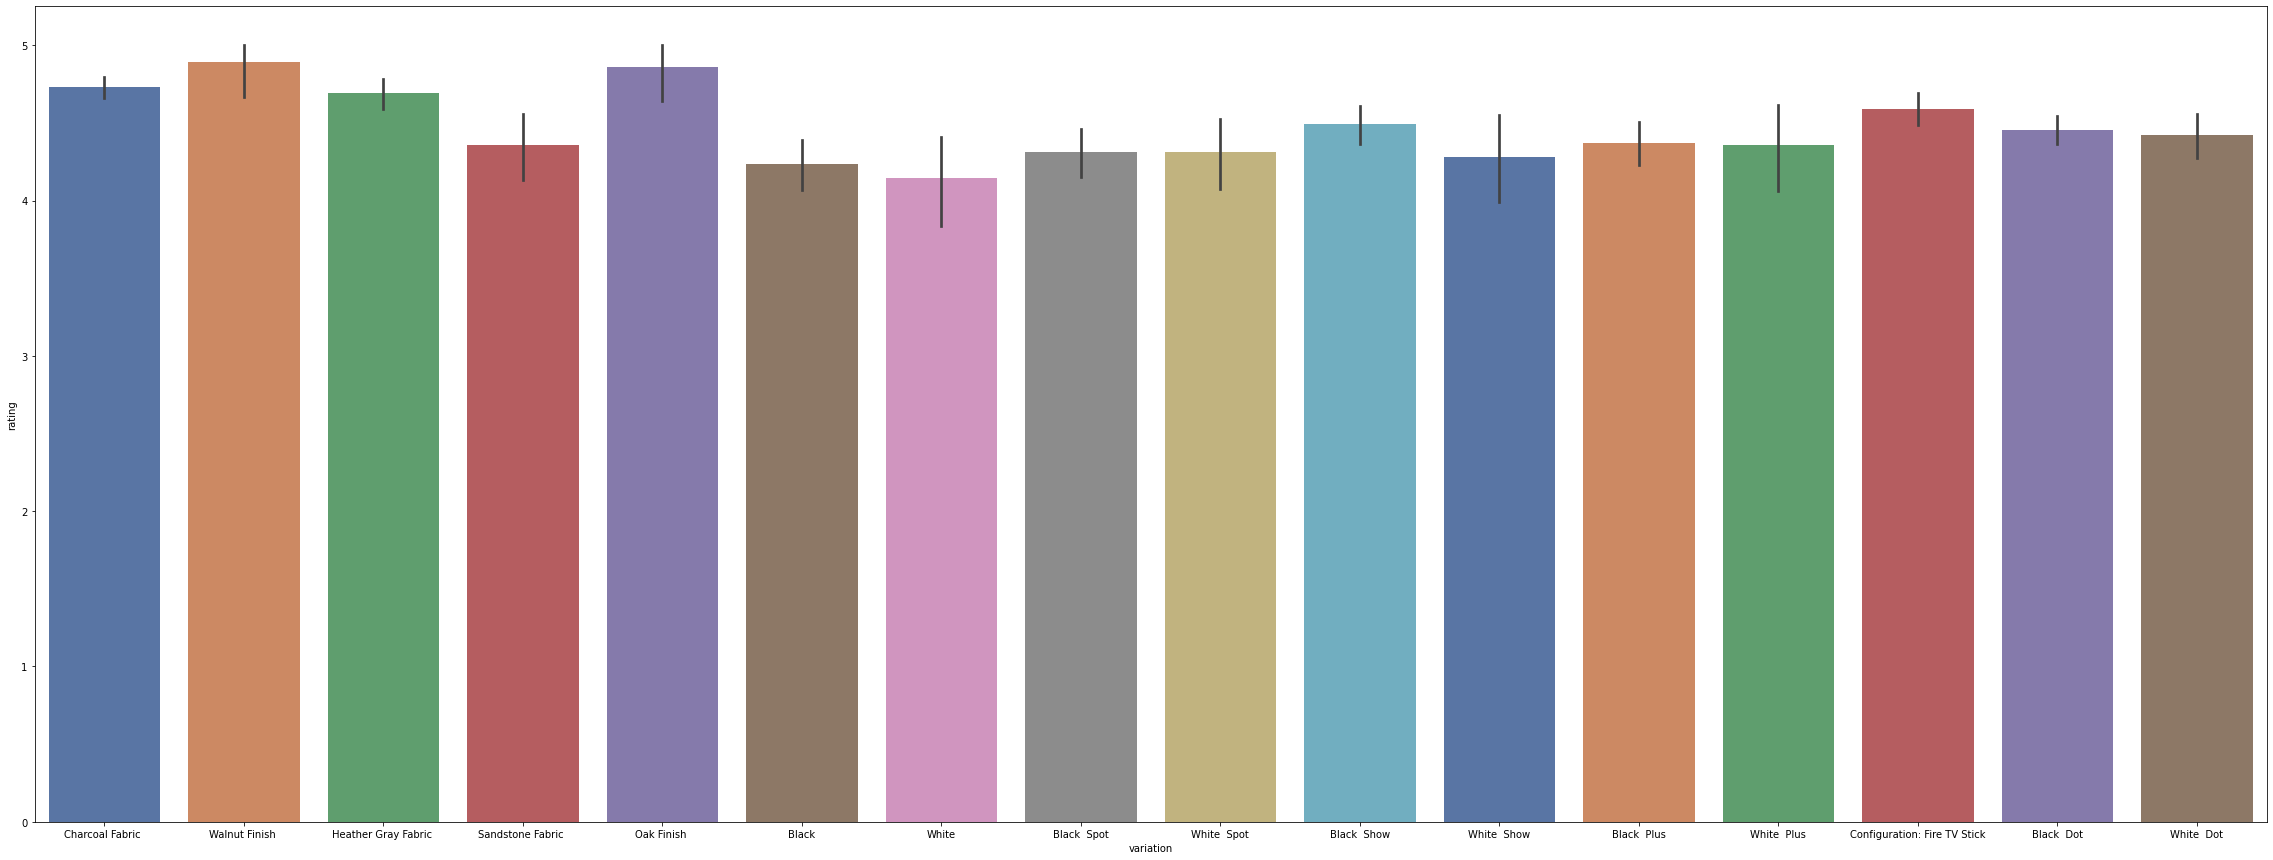

In [13]:
plt.figure(figsize= (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette='deep')

In [14]:
df_alexa = df_alexa.drop(['rating', 'date'], axis = 1)

In [15]:
variation_dumies = pd.get_dummies(df_alexa['variation'])

In [16]:
df_alexa.drop(['variation'], axis=1, inplace=True)

In [17]:
df_alexa = pd.concat([df_alexa, variation_dumies], axis= 1)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()

In [20]:
alexa_count_vectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [24]:
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)

In [25]:
reviews = pd.DataFrame(alexa_count_vectorizer.toarray())

In [26]:
df_alexa = pd.concat([df_alexa, reviews], axis =1 )

In [27]:
X = df_alexa.drop(['feedback'], axis=1)
y = df_alexa['feedback']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [32]:
classifier = tf.keras.models.Sequential() 
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060, )))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [34]:
epochs_hist = classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 15ms/step - loss: 0.2561 - accuracy: 0.9190
Epoch 2/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0774 - accuracy: 0.9710
Epoch 3/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0299 - accuracy: 0.9897
Epoch 4/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 5/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0165 - accuracy: 0.9944
Epoch 6/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0157 - accuracy: 0.9937
Epoch 7/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0162 - accuracy: 0.9944
Epoch 8/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0159 - accuracy: 0.9933
Epoch 9/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0151 - accuracy: 0.9948
Epoch 10/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0157 - accuracy: 0.9933


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)


In [37]:
cm = confusion_matrix(y_train, y_pred_train)

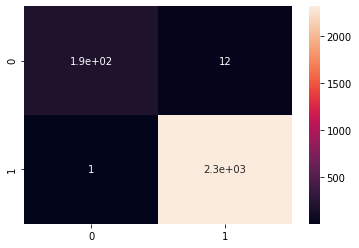

In [38]:
sns.heatmap(cm, annot=True)

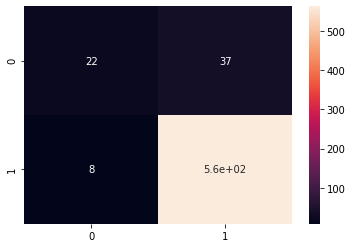

In [39]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)